In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_dataset_1 = pd.read_csv('Diabetes_dataset_1.csv',header = None)
diabetes_dataset_1.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset_1.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
diabetes_dataset_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_dataset_1.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_dataset_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

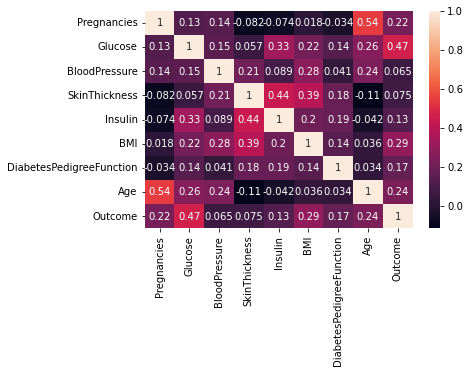

In [7]:
sns.heatmap(diabetes_dataset_1.corr(),annot=True)

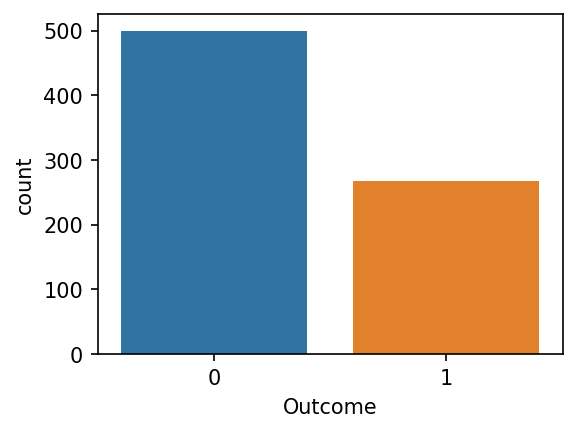

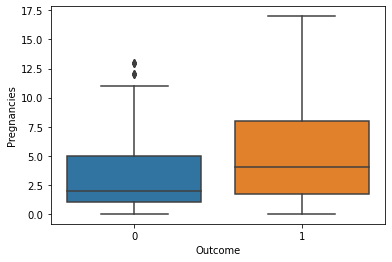

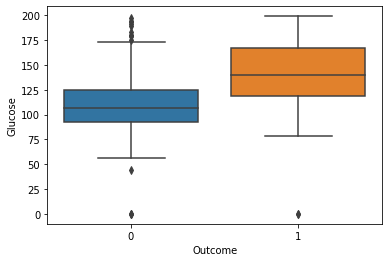

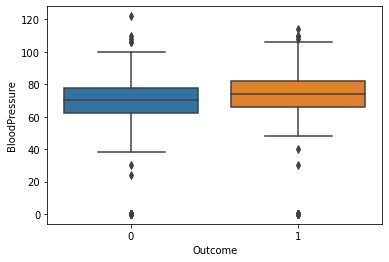

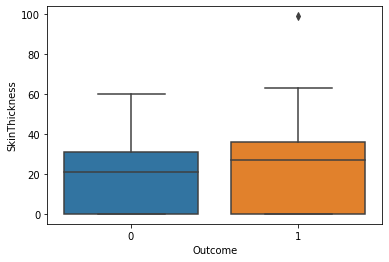

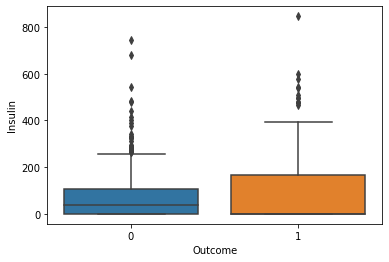

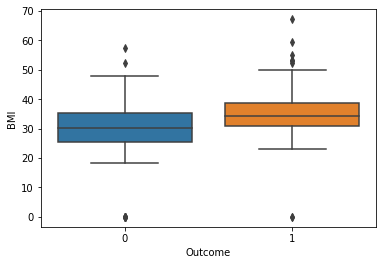

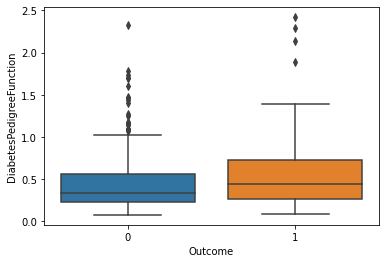

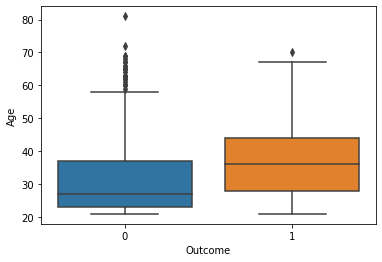

In [9]:
plt.figure(figsize=(4,3),dpi = 150)
sns.countplot(data = diabetes_dataset_1,x='Outcome')
plt.show()
for col in diabetes_dataset_1.columns:
    if col=='Outcome':
        continue
    sns.boxplot(data = diabetes_dataset_1, x='Outcome',y=col)
    plt.show()

In [9]:
diabetes_dataset_1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

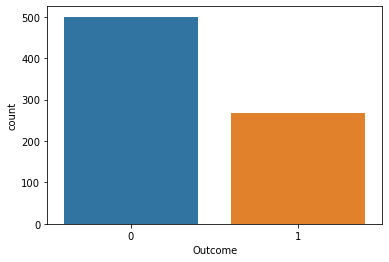

In [10]:
sns.countplot(data = diabetes_dataset_1,x='Outcome')

In [11]:
# Log Reg -> solver, maybe not multiclass, max_iter = 5000, penalty = ['l1','l2','elasticnet'] l1_ratio = np.linspace(0,1,10)
# C = np.logspace(0,10,20)
# KNN
# SVM
# Decision Tree and Random Forest

In [12]:
# logmodel.coef_
# from metrics import accuracy score, confusion matrix or plot confusion matrix, print(classification report), plot ROC
# curve, plot precision recall curve
# model_selection import GridSearch best params

In [11]:
X = diabetes_dataset_1.drop('Outcome',axis = 1)
y = diabetes_dataset_1['Outcome']

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [14]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [15]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,RocCurveDisplay,classification_report,precision_score,recall_score,f1_score
import time

In [16]:
def train_test_model(model,X_train,y_train,X_val,y_val):
    tic = time.time()
    model.fit(X_train,y_train)
    toc = time.time()
    
    predictions = model.predict(X_val)
    
    time_taken = toc-tic
    accuracy = accuracy_score(y_val,predictions)
    precision = precision_score(y_val,predictions)
    recall = recall_score(y_val,predictions)
    f1 = f1_score(y_val,predictions)
    print('Time taken: ',time_taken)
    print('Test size:',len(y_val))
    print('Total Accuracy: ',accuracy)
    print('Total Precision: ',precision)
    print('Total Recall: ',recall)
    print('Total F1 Score: ',f1)
    print("Classification Report:\n")
    print(classification_report(y_val,predictions))
    print("Confusion Matrix:\n")
    ConfusionMatrixDisplay.from_estimator(model,X_val,y_val)
    plt.show()
    print("ROC curve:\n")
    RocCurveDisplay.from_estimator(model,X_val,y_val)
    plt.show()
    
    
    return time_taken,accuracy,precision,recall,f1

In [17]:
from sklearn.linear_model import LogisticRegression

Default Log Model:

Time taken:  0.009975910186767578
Test size: 38
Total Accuracy:  0.7105263157894737
Total Precision:  0.5625
Total Recall:  0.6923076923076923
Total F1 Score:  0.6206896551724138
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.56      0.69      0.62        13

    accuracy                           0.71        38
   macro avg       0.69      0.71      0.69        38
weighted avg       0.73      0.71      0.72        38

Confusion Matrix:



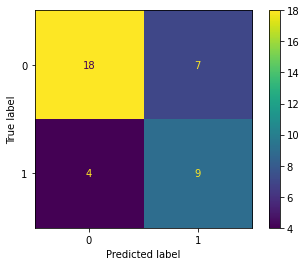

ROC curve:



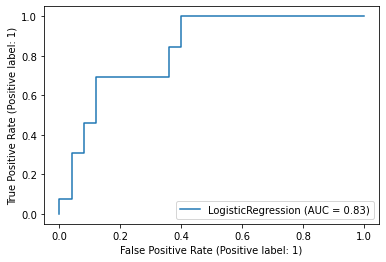

In [18]:
default_log_model = LogisticRegression()
print("Default Log Model:\n")
val1 = train_test_model(default_log_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

Default KNN Model:

Time taken:  0.011968135833740234
Test size: 38
Total Accuracy:  0.7105263157894737
Total Precision:  0.5714285714285714
Total Recall:  0.6153846153846154
Total F1 Score:  0.5925925925925927
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.57      0.62      0.59        13

    accuracy                           0.71        38
   macro avg       0.68      0.69      0.68        38
weighted avg       0.72      0.71      0.71        38

Confusion Matrix:



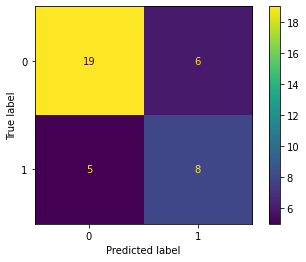

ROC curve:



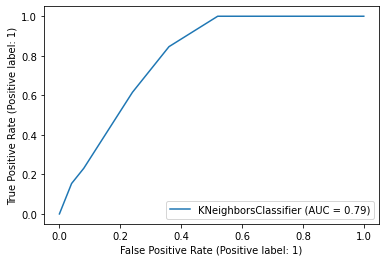

In [20]:
default_KNN_model = KNeighborsClassifier()
print("Default KNN Model:\n")
val2 = train_test_model(default_KNN_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [21]:
from sklearn.tree import DecisionTreeClassifier

Default Decision Tree Model:

Time taken:  0.005983591079711914
Test size: 38
Total Accuracy:  0.8947368421052632
Total Precision:  0.8461538461538461
Total Recall:  0.8461538461538461
Total F1 Score:  0.8461538461538461
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.89      0.89      0.89        38

Confusion Matrix:



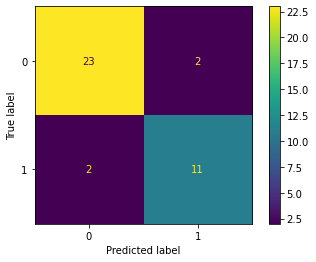

ROC curve:



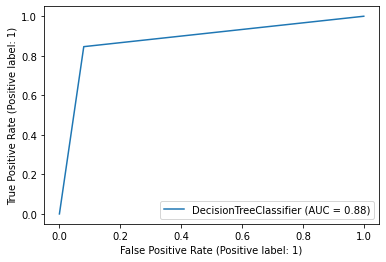

Feature Importances:
 [0.05219329 0.28543296 0.10981675 0.02578222 0.05054088 0.17901464
 0.15148789 0.14573137]


In [22]:
default_decision_tree = DecisionTreeClassifier()
print("Default Decision Tree Model:\n")
val3 = train_test_model(default_decision_tree,scaled_X_train,y_train,scaled_X_val,y_val)
print('Feature Importances:\n',default_decision_tree.feature_importances_)

In [23]:
from sklearn.ensemble import RandomForestClassifier

Default Random Forest Model:

Time taken:  0.18753480911254883
Test size: 38
Total Accuracy:  0.8157894736842105
Total Precision:  0.7142857142857143
Total Recall:  0.7692307692307693
Total F1 Score:  0.7407407407407408
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.71      0.77      0.74        13

    accuracy                           0.82        38
   macro avg       0.79      0.80      0.80        38
weighted avg       0.82      0.82      0.82        38

Confusion Matrix:



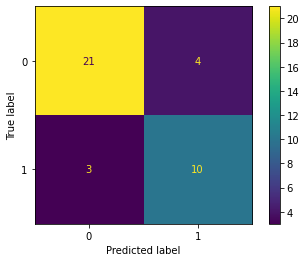

ROC curve:



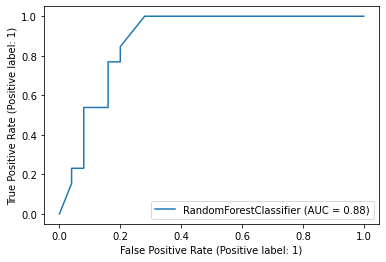

Feature Importances:
 [0.08707416 0.25794238 0.0838834  0.0680329  0.06868591 0.16247691
 0.12204129 0.14986305]


In [24]:
default_random_forest = RandomForestClassifier()
print("Default Random Forest Model:\n")
val4 = train_test_model(default_random_forest,scaled_X_train,y_train,scaled_X_val,y_val)
print('Feature Importances:\n',default_random_forest.feature_importances_)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

Cross validated Log Model:

Time taken:  10.765435218811035
Test size: 38
Total Accuracy:  0.7105263157894737
Total Precision:  0.5625
Total Recall:  0.6923076923076923
Total F1 Score:  0.6206896551724138
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.56      0.69      0.62        13

    accuracy                           0.71        38
   macro avg       0.69      0.71      0.69        38
weighted avg       0.73      0.71      0.72        38

Confusion Matrix:



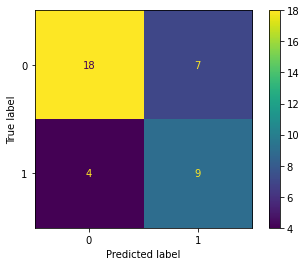

ROC curve:



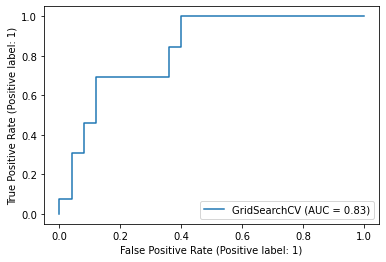

In [27]:
base_log_model = LogisticRegression(solver = 'saga',max_iter = 1000)
param_grid = {
    'penalty':['l1','l2','elasticnet'],
    'l1_ratio':np.linspace(0,1,10),
    'C':np.logspace(0,10,20)
}
grid_model = GridSearchCV(base_log_model,param_grid)
print("Cross validated Log Model:\n")
val5 = train_test_model(grid_model,scaled_X_train,y_train,scaled_X_val,y_val)
#solver, maybe not multiclass, max_iter = 5000, penalty = ['l1','l2','elasticnet'] l1_ratio = np.linspace(0,1,10)
# C = np.logspace(0,10,20)

In [28]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [29]:
from sklearn.svm import SVC

SVM(with CV): 

Time taken:  27.231409549713135
Test size: 38
Total Accuracy:  0.7105263157894737
Total Precision:  0.5625
Total Recall:  0.6923076923076923
Total F1 Score:  0.6206896551724138
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.56      0.69      0.62        13

    accuracy                           0.71        38
   macro avg       0.69      0.71      0.69        38
weighted avg       0.73      0.71      0.72        38

Confusion Matrix:



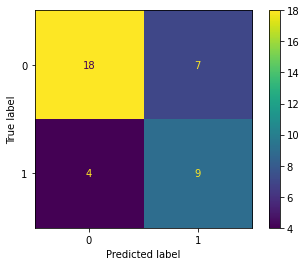

ROC curve:



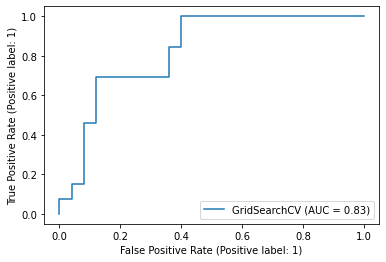

In [30]:
base_svc = SVC()
param_grid = {
    'kernel':['linear','rbf'],
    'C':[0.01,0.1,1,5,10,100,1000],
    'gamma':['auto','scale']
}
grid_model_2 = GridSearchCV(base_svc,param_grid)
print('SVM(with CV): \n')
val6 = train_test_model(grid_model_2,scaled_X_train,y_train,scaled_X_val,y_val)


In [31]:
grid_model_2.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting: 

Time taken:  16.267407417297363
Test size: 38
Total Accuracy:  0.7631578947368421
Total Precision:  0.625
Total Recall:  0.7692307692307693
Total F1 Score:  0.6896551724137931
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.62      0.77      0.69        13

    accuracy                           0.76        38
   macro avg       0.74      0.76      0.75        38
weighted avg       0.78      0.76      0.77        38

Confusion Matrix:



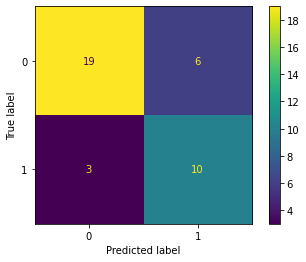

ROC curve:



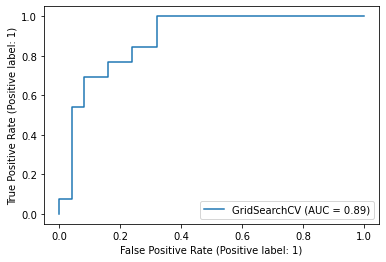

In [33]:
gb_model = GradientBoostingClassifier()
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.05,0.1,0.2],
    'max_depth':[3,4,5]
}
grid_model_3 = GridSearchCV(gb_model,param_grid)
print('Gradient Boosting: \n')
val7 = train_test_model(grid_model_3,scaled_X_train,y_train,scaled_X_val,y_val)


In [37]:
grid_model_3.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [34]:
out = pd.DataFrame([val1,val2,val3,val4,val5,val6,val7],
                   index = ['Logistic','KNN','Decision Tree','Random Forest','Logistic CV','SVM CV','Gradient Boosting'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])

out.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
Decision Tree,0.005984,0.894737,0.846154,0.846154,0.846154
Logistic,0.009976,0.710526,0.562500,0.692308,0.620690
KNN,0.011968,0.710526,0.571429,0.615385,0.592593
Random Forest,0.187535,0.815789,0.714286,0.769231,0.740741
Logistic CV,10.765435,0.710526,0.562500,0.692308,0.620690
Gradient Boosting,16.267407,0.763158,0.625000,0.769231,0.689655
SVM CV,27.231410,0.710526,0.562500,0.692308,0.620690


In [35]:
final_predictions = default_decision_tree.predict(scaled_X_test)

In [36]:
accuracy_score(y_test,final_predictions)

0.717948717948718